<a href="https://colab.research.google.com/github/unpackAI/Ai101/blob/main/Week_3_Recommeder_Systems/03_Recommender_SolutionBook_Jokes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💻Week 3 Practice Notebook of unpackAI "DL101 Bootcamp"


## 📕 Learning Objectives

* Understand the fundamental process of building your own collaborative filtering project.

## unpackAI Assignment Section

 
*   **Assignment 1**: Go through the multiple choice questions below and choose the correct answer. Discuss during the presentation session.
*   **Assignment 2**: Build an entire model using the suggested data sets. you will need to understand the data and then decide how you want to approach the problme. Then test your model and see which items are closely related.



In [1]:
!pip install -Uqq fastbook
!pip install -Uqq unpackai
!pip install -Uqq tornado~=5.1.0 folium==0.2.1

     |████████████████████████████████| 719 kB 28.2 MB/s 
     |████████████████████████████████| 4.4 MB 51.5 MB/s 
     |████████████████████████████████| 1.2 MB 43.4 MB/s 
     |████████████████████████████████| 365 kB 40.8 MB/s 
     |████████████████████████████████| 140 kB 58.5 MB/s 
     |████████████████████████████████| 1.1 MB 56.6 MB/s 
     |████████████████████████████████| 101 kB 12.5 MB/s 
     |████████████████████████████████| 212 kB 73.9 MB/s 
     |████████████████████████████████| 596 kB 71.6 MB/s 
     |████████████████████████████████| 127 kB 72.2 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 144 kB 54.3 MB/s 
     |████████████████████████████████| 271 kB 54.7 MB/s 
     |████████████████████████████████| 6.6 MB 15.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.1

In [2]:
from fastbook import *
from fastai.collab import *
from fastai.tabular.all import *

## Assigment 1: Go through the questions below and indicate the answers you have selected

### Questionnaire 

Make sure you are able to answer the questions as they are written to make sure that you have an understanding of the work that you have learned. 

|#|Question|Answer
|:--|:---|:---
|1.|Name three types of recommender systems|A: Content based, Tabular based, Mixed approach
|||B: Collaborative, Hybrid, Content based 
|||C: Tabular, CNN method, Collaborative
|2.|What are the different approaches to Content Based filtering?|A: Product-centered approach
|||B: User information collaboration
|||C: Item-Centered or user centered approach 
|3.|Give an example of a use case for collaborative filtering|A: Netflix recomending movies based on your ratings 
|||B: Amazon predicting your future orders
|||C: Predicting the next crime hotspot
|4.|What problem does collaborative filtering solve?|A: The problem of understanding the collaboration of different datasets
|||B: The problem of having a large number of users and product and how to recommend different items to a user based on their previous choices and how they rated them.
|||C The problem the Netflix had of how to recommend movies to users based on the movies that a user watched and what rating they gave it.
|5.|What does NaN stand for?|A: Now and Never
|||B: Numbers and Null
|||C: Not a Number 
|6.|How does Collaborative Filtering solve the problem of relationships between product and user?|A: Collaborative filtering uses latent factors to determine how items relate to each other and what customer's preferences are. 
|||B: Collaborative filtering uses all the data you can feed the model and comes up with the best possible solution but we are not sure how it does this as the meaning of the latent factors is very abstract.
|||C: Collaborative filtering uses a table of big data that is too big and complex for a person to look at and it can see patterns in the data that allow it to recommend items
|7.|What would cause a Collaborative Filtering recommendation system to fail?|A: The model might fail because there is not sufficient data to be able to make the latent factors make sense.
|||B: The model might fail if too many people put in inaccurate ratings in stead of giving an honest answer. The outcome is based on how accurately you rate a movie.
|||C: The model might fail if it over fits the data.


## Assigment 2: 

## Assignment 2: Build an entire collaborative filtering model starting from defining your objective, construcing your dataset to training your model and interpreting the results.

### Description of the Assignment

We have identified a number of data sets that you can use to build your own collabroative filtering project. Choose the data set that you would like to work on and by refactoring the code you have learned in the coursebook train your own colaborative filtering model and see what results you are able to get.  

Below you will find a brief description of the data set you can choose to download the data set to your local computer and open it in Excel or you can use Python and look at the data so that you can define your project clearly before you make you final choice and start coding.

**Jester Collaborative Filtering Dataset** 

The funniness of joke is very subjective. Having more than 70,000 users rate jokes, can an algorithm be written to identify the universally funny joke? 
Since funniness is a very subjective matter, it will be very interesting to see if latent factors can bring out the details on what makes something funny.

*Download the dataset here:*
https://www.dropbox.com/s/ef1mytjms1indlf/jester_collaborative_filtering.zip?dl=1

Find the dataset [here](https://www.kaggle.com/aakaashjois/jester-collaborative-filtering-dataset)


### Assignment 2 execution

Once you have selected the data set you want to work on and you have defined your project you can start coding:

### **Joke Recommendations Database** 

#### 1. Define a Recommender System problem and propose a solution:

***Describe your items:*** JokesID

***Describe your users:*** User 0- User X

***What's the rating range?:*** -10 to 10


#### 2. Collect and construct your dataset:

In [3]:
# Transfers data from the internet, onto the google colab server
path = untar_data('https://www.dropbox.com/s/ef1mytjms1indlf/jester_collaborative_filtering.zip?dl=1')

# The path object assists in keeping track of files in directories
Path.BASE_PATH = path

In [4]:

# This output shows ou what files your dataset is stored in 
# As you can see there are three files.
# Why do two of them have very similar names?
path.ls()

(#3) [Path('UserRatings2.csv'),Path('JokeText.csv'),Path('UserRatings1.csv')]

In [5]:
# This next line moves the data from the hard drive, which is optimized for storage
# Into system memory, more popularly known as RAM
# RAM is optimized for fast calculations rather than long term storage. 

UserRatings1 = pd.read_csv(path/'UserRatings1.csv')
UserRatings1.head()#This shows us the "head"(i.e. first 5 rows) of the table.

,JokeId,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,User11,User12,User13,User14,User15,User16,User17,User18,User19,User20,User21,User22,User23,User24,User25,User26,User27,User28,User29,User30,User31,User32,User33,User34,User35,User36,User37,User38,User39,User40,User41,User42,User43,User44,User45,User46,User47,User48,User49,User50,User51,User52,User53,User54,User55,User56,User57,User58,User59,User60,User61,User62,User63,User64,User65,User66,User67,User68,User69,User70,User71,User72,User73,User74,User75,User76,User77,User78,User79,User80,User81,User82,User83,User84,User85,User86,User87,User88,User89,User90,User91,User92,User93,User94,User95,User96,User97,User98,User99,User100,User101,User102,User103,User104,User105,User106,User107,User108,User109,User110,User111,User112,User113,User114,User115,User116,User117,User118,User119,User120,User121,User122,User123,User124,User125,User126,User127,User128,User129,User130,User131,User132,User133,User134,User135,User136,User137,User138,User139,User140,User141,User142,User143,User144,User145,User146,User147,User148,User149,User150,User151,User152,User153,User154,User155,User156,User157,User158,User159,User160,User161,User162,User163,User164,User165,User166,User167,User168,User169,User170,User171,User172,User173,User174,User175,User176,User177,User178,User179,User180,User181,User182,User183,User184,User185,User186,User187,User188,User189,User190,User191,User192,User193,User194,User195,User196,User197,User198,User199,User200,User201,User202,User203,User204,User205,User206,User207,User208,User209,User210,User211,User212,User213,User214,User215,User216,User217,User218,User219,User220,User221,User222,User223,User224,User225,User226,User227,User228,User229,User230,User231,User232,User233,User234,User235,User236,User237,User238,User239,User240,User241,User242,User243,User244,User245,User246,User247,User248,User249,User250,User251,User252,User253,User254,User255,User256,User257,User258,User259,User260,User261,User262,User263,User264,User265,User266,User267,User268,User269,User270,User271,User272,User273,User274,User275,User276,User277,User278,User279,User280,User281,User282,User283,User284,User285,User286,User287,User288,User289,User290,User291,User292,User293,User294,User295,User296,User297,User298,User299,User300,User301,User302,User303,User304,User305,User306,User307,User308,User309,User310,User311,User312,User313,User314,User315,User316,User317,User318,User319,User320,User321,User322,User323,User324,User325,User326,User327,User328,User329,User330,User331,User332,User333,User334,User335,User336,User337,User338,User339,User340,User341,User342,User343,User344,User345,User346,User347,User348,User349,User350,User351,User352,User353,User354,User355,User356,User357,User358,User359,User360,User361,User362,User363,User364,User365,User366,User367,User368,User369,User370,User371,User372,User373,User374,User375,User376,User377,User378,User379,User380,User381,User382,User383,User384,User385,User386,User387,User388,User389,User390,User391,User392,User393,User394,User395,User396,User397,User398,User399,User400,User401,User402,User403,User404,User405,User406,User407,User408,User409,User410,User411,User412,User413,User414,User415,User416,User417,User418,User419,User420,User421,User422,User423,User424,User425,User426,User427,User428,User429,User430,User431,User432,User433,User434,User435,User436,User437,User438,User439,User440,User441,User442,User443,User444,User445,User446,User447,User448,User449,User450,User451,User452,User453,User454,User455,User456,User457,User458,User459,User460,User461,User462,User463,User464,User465,User466,User467,User468,User469,User470,User471,User472,User473,User474,User475,User476,User477,User478,User479,User480,User481,User482,User483,User484,User485,User486,User487,User488,User489,User490,User491,User492,User493,User494,User495,User496,User497,User498,...,User36212,User36213,User36214,User36215,User36216,User36217,User36218,User36219,User36220,User36221,User36222,Us

In [6]:
# Here it looks like we have two very similar files. 
# We will need to combine them in the future?
# How would you imagine doing this? 

UserRatings2 = pd.read_csv(path/'UserRatings2.csv')
UserRatings2.head() #This shows us the "head"(i.e. first 5 rows) of the table.

,JokeId,User36711,User36712,User36713,User36714,User36715,User36716,User36717,User36718,User36719,User36720,User36721,User36722,User36723,User36724,User36725,User36726,User36727,User36728,User36729,User36730,User36731,User36732,User36733,User36734,User36735,User36736,User36737,User36738,User36739,User36740,User36741,User36742,User36743,User36744,User36745,User36746,User36747,User36748,User36749,User36750,User36751,User36752,User36753,User36754,User36755,User36756,User36757,User36758,User36759,User36760,User36761,User36762,User36763,User36764,User36765,User36766,User36767,User36768,User36769,User36770,User36771,User36772,User36773,User36774,User36775,User36776,User36777,User36778,User36779,User36780,User36781,User36782,User36783,User36784,User36785,User36786,User36787,User36788,User36789,User36790,User36791,User36792,User36793,User36794,User36795,User36796,User36797,User36798,User36799,User36800,User36801,User36802,User36803,User36804,User36805,User36806,User36807,User36808,User36809,User36810,User36811,User36812,User36813,User36814,User36815,User36816,User36817,User36818,User36819,User36820,User36821,User36822,User36823,User36824,User36825,User36826,User36827,User36828,User36829,User36830,User36831,User36832,User36833,User36834,User36835,User36836,User36837,User36838,User36839,User36840,User36841,User36842,User36843,User36844,User36845,User36846,User36847,User36848,User36849,User36850,User36851,User36852,User36853,User36854,User36855,User36856,User36857,User36858,User36859,User36860,User36861,User36862,User36863,User36864,User36865,User36866,User36867,User36868,User36869,User36870,User36871,User36872,User36873,User36874,User36875,User36876,User36877,User36878,User36879,User36880,User36881,User36882,User36883,User36884,User36885,User36886,User36887,User36888,User36889,User36890,User36891,User36892,User36893,User36894,User36895,User36896,User36897,User36898,User36899,User36900,User36901,User36902,User36903,User36904,User36905,User36906,User36907,User36908,User36909,User36910,User36911,User36912,User36913,User36914,User36915,User36916,User36917,User36918,User36919,User36920,User36921,User36922,User36923,User36924,User36925,User36926,User36927,User36928,User36929,User36930,User36931,User36932,User36933,User36934,User36935,User36936,User36937,User36938,User36939,User36940,User36941,User36942,User36943,User36944,User36945,User36946,User36947,User36948,User36949,User36950,User36951,User36952,User36953,User36954,User36955,User36956,User36957,User36958,User36959,User36960,User36961,User36962,User36963,User36964,User36965,User36966,User36967,User36968,User36969,User36970,User36971,User36972,User36973,User36974,User36975,User36976,User36977,User36978,User36979,User36980,User36981,User36982,User36983,User36984,User36985,User36986,User36987,User36988,User36989,User36990,User36991,User36992,User36993,User36994,User36995,User36996,User36997,User36998,User36999,User37000,User37001,User37002,User37003,User37004,User37005,User37006,User37007,User37008,User37009,User37010,User37011,User37012,User37013,User37014,User37015,User37016,User37017,User37018,User37019,User37020,User37021,User37022,User37023,User37024,User37025,User37026,User37027,User37028,User37029,User37030,User37031,User37032,User37033,User37034,User37035,User37036,User37037,User37038,User37039,User37040,User37041,User37042,User37043,User37044,User37045,User37046,User37047,User37048,User37049,User37050,User37051,User37052,User37053,User37054,User37055,User37056,User37057,User37058,User37059,User37060,User37061,User37062,User37063,User37064,User37065,User37066,User37067,User37068,User37069,User37070,User37071,User37072,User37073,User37074,User37075,User37076,User37077,User37078,User37079,User37080,User37081,User37082,User37083,User37084,User37085,User37086,User37087,User37088,User37089,User37090,User37091,User37092,User37093,User37094,User37095,User37096,User37097,User37098,User37099,User37100,User37101,User37102,User37103,User37104,User37105,User37106,User37107,User37108,User37109,Us

In [7]:

# Here, we will drop JokeId because it is repeating the same information that is held in the index
# This can also be done in the read_csv() line
# However, it is an importatnt skill to be able to drop columns

# Notice that we need to specify the axis
UserRatings2.drop('JokeId',axis=1,inplace=True)

In [8]:
# This next line is where the magic happens
# concat is short for the word concatenate
# to concatenate means to link or join together in a chain or series

# It is different than adding because you can add 2 + 2 = 4. If you concatenate you are not doing math
# But rather expanding the size of the table. 

UserRatings = pd.concat([UserRatings1, UserRatings2], axis=1)
UserRatings.head()

# If we look at the bottom left corner, we'll se that we now have 73422 rows, since all the user
# data is stored in one place
# Amazing how well pandas can store this data which would crash excel

,JokeId,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,User11,User12,User13,User14,User15,User16,User17,User18,User19,User20,User21,User22,User23,User24,User25,User26,User27,User28,User29,User30,User31,User32,User33,User34,User35,User36,User37,User38,User39,User40,User41,User42,User43,User44,User45,User46,User47,User48,User49,User50,User51,User52,User53,User54,User55,User56,User57,User58,User59,User60,User61,User62,User63,User64,User65,User66,User67,User68,User69,User70,User71,User72,User73,User74,User75,User76,User77,User78,User79,User80,User81,User82,User83,User84,User85,User86,User87,User88,User89,User90,User91,User92,User93,User94,User95,User96,User97,User98,User99,User100,User101,User102,User103,User104,User105,User106,User107,User108,User109,User110,User111,User112,User113,User114,User115,User116,User117,User118,User119,User120,User121,User122,User123,User124,User125,User126,User127,User128,User129,User130,User131,User132,User133,User134,User135,User136,User137,User138,User139,User140,User141,User142,User143,User144,User145,User146,User147,User148,User149,User150,User151,User152,User153,User154,User155,User156,User157,User158,User159,User160,User161,User162,User163,User164,User165,User166,User167,User168,User169,User170,User171,User172,User173,User174,User175,User176,User177,User178,User179,User180,User181,User182,User183,User184,User185,User186,User187,User188,User189,User190,User191,User192,User193,User194,User195,User196,User197,User198,User199,User200,User201,User202,User203,User204,User205,User206,User207,User208,User209,User210,User211,User212,User213,User214,User215,User216,User217,User218,User219,User220,User221,User222,User223,User224,User225,User226,User227,User228,User229,User230,User231,User232,User233,User234,User235,User236,User237,User238,User239,User240,User241,User242,User243,User244,User245,User246,User247,User248,User249,User250,User251,User252,User253,User254,User255,User256,User257,User258,User259,User260,User261,User262,User263,User264,User265,User266,User267,User268,User269,User270,User271,User272,User273,User274,User275,User276,User277,User278,User279,User280,User281,User282,User283,User284,User285,User286,User287,User288,User289,User290,User291,User292,User293,User294,User295,User296,User297,User298,User299,User300,User301,User302,User303,User304,User305,User306,User307,User308,User309,User310,User311,User312,User313,User314,User315,User316,User317,User318,User319,User320,User321,User322,User323,User324,User325,User326,User327,User328,User329,User330,User331,User332,User333,User334,User335,User336,User337,User338,User339,User340,User341,User342,User343,User344,User345,User346,User347,User348,User349,User350,User351,User352,User353,User354,User355,User356,User357,User358,User359,User360,User361,User362,User363,User364,User365,User366,User367,User368,User369,User370,User371,User372,User373,User374,User375,User376,User377,User378,User379,User380,User381,User382,User383,User384,User385,User386,User387,User388,User389,User390,User391,User392,User393,User394,User395,User396,User397,User398,User399,User400,User401,User402,User403,User404,User405,User406,User407,User408,User409,User410,User411,User412,User413,User414,User415,User416,User417,User418,User419,User420,User421,User422,User423,User424,User425,User426,User427,User428,User429,User430,User431,User432,User433,User434,User435,User436,User437,User438,User439,User440,User441,User442,User443,User444,User445,User446,User447,User448,User449,User450,User451,User452,User453,User454,User455,User456,User457,User458,User459,User460,User461,User462,User463,User464,User465,User466,User467,User468,User469,User470,User471,User472,User473,User474,User475,User476,User477,User478,User479,User480,User481,User482,User483,User484,User485,User486,User487,User488,User489,User490,User491,User492,User493,User494,User495,User496,User497,User498,...,User72923,User72924,User72925,User72926,User72927,User72928,User72929,User72930,User72931,User72932,User72933,Us

In [9]:
# dropna removes missing data from the dataframe based on the axis
# missing data can affect a model because if too many values are missing, the models can become much less accurate

# In this dataset there are many users who have only used the site a few times, 
# THis data is not very useful to us for model training because of the missing values

# Instead we can focus more on the core users of the platform

UserRatings.dropna(axis=1, thresh=100, inplace=True)
UserRatings.head()

,JokeId,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,User11,User12,User13,User14,User15,User16,User17,User18,User19,User20,User21,User22,User23,User24,User25,User26,User27,User28,User29,User30,User31,User32,User33,User34,User35,User36,User37,User38,User39,User40,User41,User42,User43,User44,User45,User46,User47,User48,User49,User50,User51,User52,User53,User54,User55,User56,User57,User58,User59,User60,User61,User62,User63,User64,User65,User66,User67,User68,User69,User70,User71,User72,User73,User74,User75,User76,User77,User78,User79,User80,User81,User82,User83,User84,User85,User86,User87,User88,User89,User90,User91,User92,User93,User94,User95,User96,User97,User98,User99,User100,User101,User102,User103,User104,User105,User106,User107,User108,User109,User110,User111,User112,User113,User114,User115,User116,User117,User118,User119,User120,User121,User122,User123,User124,User125,User126,User127,User128,User129,User130,User131,User132,User133,User134,User135,User136,User137,User138,User139,User140,User141,User142,User143,User144,User145,User146,User147,User148,User149,User150,User151,User152,User153,User154,User155,User156,User157,User158,User159,User160,User161,User162,User163,User164,User165,User166,User167,User168,User169,User170,User171,User172,User173,User174,User175,User176,User177,User178,User179,User180,User181,User182,User183,User184,User185,User186,User187,User188,User189,User190,User191,User192,User193,User194,User195,User196,User197,User198,User199,User200,User201,User202,User203,User204,User205,User206,User207,User208,User209,User210,User211,User212,User213,User214,User215,User216,User217,User218,User219,User220,User221,User222,User223,User224,User225,User226,User227,User228,User229,User230,User231,User232,User233,User234,User235,User236,User237,User238,User239,User240,User241,User242,User243,User244,User245,User246,User247,User248,User249,User250,User251,User252,User253,User254,User255,User256,User257,User258,User259,User260,User261,User262,User263,User264,User265,User266,User267,User268,User269,User270,User271,User272,User273,User274,User275,User276,User277,User278,User279,User280,User281,User282,User283,User284,User285,User286,User287,User288,User289,User290,User291,User292,User293,User294,User295,User296,User297,User298,User299,User300,User301,User302,User303,User304,User305,User306,User307,User308,User309,User310,User311,User312,User313,User314,User315,User316,User317,User318,User319,User320,User321,User322,User323,User324,User325,User326,User327,User328,User329,User330,User331,User332,User333,User334,User335,User336,User337,User338,User339,User340,User341,User342,User343,User344,User345,User346,User347,User348,User349,User350,User351,User352,User353,User354,User355,User356,User357,User358,User359,User360,User361,User362,User363,User364,User365,User366,User367,User368,User369,User370,User371,User372,User373,User374,User375,User376,User377,User378,User379,User380,User381,User382,User383,User384,User385,User386,User387,User388,User389,User390,User391,User392,User393,User394,User395,User396,User397,User398,User399,User400,User401,User402,User403,User404,User405,User406,User407,User408,User409,User410,User411,User412,User413,User414,User415,User416,User417,User418,User419,User420,User421,User422,User423,User424,User425,User426,User427,User428,User429,User430,User431,User432,User433,User434,User435,User436,User437,User438,User439,User440,User441,User442,User443,User444,User445,User446,User447,User448,User449,User450,User451,User452,User453,User454,User455,User456,User457,User458,User459,User460,User461,User462,User463,User464,User465,User466,User467,User468,User469,User470,User471,User472,User473,User474,User475,User476,User477,User478,User479,User480,User481,User482,User483,User484,User485,User486,User487,User488,User489,User490,User491,User492,User493,User494,User495,User496,User497,User498,...,User13618,User13619,User13620,User13621,User13622,User13623,User13624,User13625,User13626,User13627,User13628,Us

### Revisiting Jokes.txt

Here we have the information about the content. JokeId becomes an important column because it allows us to link the two tables together. 

In [10]:
# Here is wh

joke_text = pd.read_csv(path/'JokeText.csv')
joke_text.head() #This shows us the "head"(i.e. first 5 rows) of the table.

,JokeId,JokeText
0,0,"A man visits the doctor. The doctor says ""I have bad news for you.You have\ncancer and Alzheimer's disease"". \nThe man replies ""Well,thank God I don't have cancer!""\n"
1,1,"This couple had an excellent relationship going until one day he came home\nfrom work to find his girlfriend packing. He asked her why she was leaving him\nand she told him that she had heard awful things about him. \n\n""What could they possibly have said to make you move out?"" \n\n""They told me that you were a pedophile."" \n\nHe replied, ""That's an awfully big word for a ten year old."" \n"
2,2,Q. What's 200 feet long and has 4 teeth? \n\nA. The front row at a Willie Nelson Concert.\n
3,3,Q. What's the difference between a man and a toilet? \n\nA. A toilet doesn't follow you around after you use it.\n
4,4,"Q.\tWhat's O. J. Simpson's Internet address? \nA.\tSlash, slash, backslash, slash, slash, escape.\n"


In [11]:
# Here, we have now changed the shape of the dataset

# This is similar to a pivot table operation

# In the original table, we had a column for each user. This can become difficult to handle because of 
# The many missing values

# instead, we can represent the users using fewer columns and more rows.

# this is much more efficient

ratings = UserRatings.melt(id_vars="JokeId",var_name='Users', value_name="Rating")
ratings.head()

,JokeId,Users,Rating
0,0,User1,5.10
1,1,User1,4.90
2,2,User1,1.75
3,3,User1,-4.17
4,4,User1,5.15


#### 3. Carry out data transformation

In [12]:
ratings = joke_text.merge(ratings[["Users", "Rating", "JokeId"]])
ratings.head() #This shows us the "head"(i.e. first 5 rows) of the table.

,JokeId,JokeText,Users,Rating
0,0,"A man visits the doctor. The doctor says ""I have bad news for you.You have\ncancer and Alzheimer's disease"". \nThe man replies ""Well,thank God I don't have cancer!""\n",User1,5.10
1,0,"A man visits the doctor. The doctor says ""I have bad news for you.You have\ncancer and Alzheimer's disease"". \nThe man replies ""Well,thank God I don't have cancer!""\n",User2,-8.79
2,0,"A man visits the doctor. The doctor says ""I have bad news for you.You have\ncancer and Alzheimer's disease"". \nThe man replies ""Well,thank God I don't have cancer!""\n",User3,-3.50
3,0,"A man visits the doctor. The doctor says ""I have bad news for you.You have\ncancer and Alzheimer's disease"". \nThe man replies ""Well,thank God I don't have cancer!""\n",User4,7.14
4,0,"A man visits the doctor. The doctor says ""I have bad news for you.You have\ncancer and Alzheimer's disease"". \nThe man replies ""Well,thank God I don't have cancer!""\n",User5,-8.79


In [13]:
ratings.dtypes

JokeId        int64
JokeText     object
Users        object
Rating      float64
dtype: object

In [14]:
dls = CollabDataLoaders.from_df(ratings, user_name='Users', item_name='JokeText', rating_name='Rating')
dls.show_batch()

,Users,JokeText,Rating
0,User661,"What a woman says:\n\n""This place is a mess! C'mon,\nYou and I need to clean up,\nYour stuff is lying on the floor and\nyou'll have no clothes to wear,\nif we don't do laundry right now!""\n\nWhat a man hears:\n\nblah, blah, blah, blah, C'mon\nblah, blah, blah, blah, you and I\nblah, blah, blah, blah, on the floor\nblah, blah, blah, blah, no clothes\nblah, blah, blah, blah, RIGHT NOW!\n",6.17
1,User13248,"Arnold Swartzeneger and Sylvester Stallone are making a movie about\nthe lives of the great composers. \nStallone says ""I want to be Mozart."" \nSwartzeneger says: ""In that case... I'll be Bach.""\n",6.36
2,User5260,"What a woman says:\n\n""This place is a mess! C'mon,\nYou and I need to clean up,\nYour stuff is lying on the floor and\nyou'll have no clothes to wear,\nif we don't do laundry right now!""\n\nWhat a man hears:\n\nblah, blah, blah, blah, C'mon\nblah, blah, blah, blah, you and I\nblah, blah, blah, blah, on the floor\nblah, blah, blah, blah, no clothes\nblah, blah, blah, blah, RIGHT NOW!\n",7.72
3,User2193,"A radio conversation of a US naval \nship with Canadian authorities ... \n\nAmericans: Please divert your course 15 degrees to the North to avoid a\ncollision.\n\nCanadians: Recommend you divert YOUR course 15 degrees to the South to \navoid a collision.\n\nAmericans: This is the Captain of a US Navy ship. I say again, divert \nYOUR course.\n\nCanadians: No. I say again, you divert YOUR course.\n\nAmericans: This is the aircraft carrier USS LINCOLN, the second largest ship in the United States' Atlantic Fleet. We are accompanied by three destroyers, three cruisers and numerous support vessels. I demand that you change your course 15 degrees north, that's ONE FIVE DEGREES NORTH, or counter-measures will be undertaken to ensure the safety of this ship.\n\nCanadians: This is a lighthouse. Your call.\n",-3.79
4,User2321,"A boy comes home from school and tells his mother that he got a part\nin the school play. ""What part?"" the mother asked. ""I play a Jewish\nhusband,"" the boy replied. \n""Go back to school and tell your teacher that you want a speaking role!""\n",6.02
5,User5895,"A man visits the doctor. The doctor says ""I have bad news for you.You have\ncancer and Alzheimer's disease"". \nThe man replies ""Well,thank God I don't have cancer!""\n",-8.79
6,User5411,"On the first day of college, the Dean addressed the students,\npointing out some of the rules:\n\n""The female dormitory will be out-of-bounds for all male students\nand the male dormitory to the female students. Anybody caught breaking\nthis rule will be finded $20 the first time."" He continued, ""Anybody \ncaught breaking this rule the second time will be fined $60. Being caught\na third time will cost you a fine of $180. Are there any questions ?""\n\nAt this point, a male student in the crowd inquired:\n""How much for a season pass ?""\n",5.73
7,User9227,"Hillary, Bill Clinton and the Pope are sitting together on an airplane.\n\nBill says ""I could throw one thousand dollar bill out of this plane and\nmake one person very happy.""\n\nHillary says ""I could throw 10 hundred dollar bills out of the plane and\nmake 10 people very happy.""\n\nThe Pope chips in and says ""I could throw Bill out of the airplane and make the whole \ncountry happy.""\n",-6.26
8,User11262,A bus station is where a bus stops.\nA train station is where a train stops.\n\nOn my desk I have a work station...\n,3.16
9,User11162,"One Sunday morning William burst into the living room and said,\n""Dad! Mom! I have some great news for you! I am getting married\nto the most beautiful girl in town. She lives a block away and\nher name is Susan.""\nAfter dinner, William's dad took him aside. ""Son, I have to talk\nwith you. Your mother and I have been married 30 years.. She's a\nwonderful wife but she has never offered much excitement in the\nbedroom, so I used to fool around with women a lot. Susan is\nactually your half-sister, and I'm afraid you 

In [15]:
range_rating = (min(ratings['Rating']), max(ratings['Rating']))
range_rating

(-9.95, 9.47)

In [16]:
learn = collab_learner(dls, n_factors=100, y_range=(-10.5, 10.5), metrics=rmse)

In [17]:
# Each epoch takes about 2-3 minutes with a GPU 
# If it is too slow, please check if you are using the right runtime


# In this we are comparing the train_loss and the valid_loss. 
# Once the valid_loss starts to increase, it means that our model has been trained for long enough
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,_rmse,time
0,18.050339,18.604452,4.313286,02:19
1,16.074543,16.355865,4.044236,02:57
2,13.352901,15.928007,3.990994,02:42
3,10.350183,16.100229,4.012509,02:46
4,8.485383,16.167633,4.020902,02:05


In [ ]:
# If you would like you can continue to train, and experiment with different numbers
learn.fit_one_cycle(4)

In [19]:
#@title Top 25 most rated jokes

# Let's take another look at the data, and find the most
# popular jokes in the dataset
g = ratings.groupby('JokeText')['Rating'].count()
top_jokes = g.sort_values(ascending=False).index.values[:25]
top_jokes

array([' President Clinton looks up from his desk in the Oval Office to see\n one of his aides nervously approach him. \n "What is it?" exclaims the President. \n"It\'s this Abortion Bill Mr. President, what do you want to do\n about it?" the aide replies. \n"Just go ahead and pay it." responds the President. \n',
       "Q: How many programmers does it take to change a lightbulb?\n\nA: NONE!   That's a hardware problem....\n",
       'Reaching the end of a job interview, the human resources person asked a\nyoung engineer fresh out of Stanford,\n\n"And what starting salary were you looking for?"\n\nThe engineer said, "In the neighborhood of $125,000 a year, depending\non the benefits package."\n\nThe interviewer said, "Well, what would you say to a package of 5-weeks \nvacation, 14 paid holidays, full medical and dental, company matching \nretirement fund to 50% of salary, and a company car leased every 2 years - \nsay, a red Corvette?"\n\nThe Engineer sat up straight and said, "Wow! A

In [20]:
joke_w = learn.model.weight(top_jokes)
joke_w.shape

torch.Size([25, 100])

In [21]:
#@title Dimensionality Reduction
joke_pca = joke_w.pca(2)
fac0,fac1 = joke_pca.t()
joke_comp = [(f, i) for f,i in zip(fac0, top_jokes)]
joke_pca.shape

torch.Size([25, 2])

In [22]:
#@title Top 10 with the highest score on the first dimension.
sorted(joke_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(2.8027),
  'Q: Whats the difference between greeting a Queen and greeting the\nPresident of the United  States?\n\nA: You only have to get on one knee to greet the queen.\n'),
 (tensor(2.5881),
  "Q.\tWhat's O. J. Simpson's Internet address? \nA.\tSlash, slash, backslash, slash, slash, escape.\n"),
 (tensor(1.9069),
  'Q: What do Monica Lewinsky and Bob Dole have in common?\nA: They were both upset when Bill finished first.\n'),
 (tensor(1.7055),
  ' President Clinton looks up from his desk in the Oval Office to see\n one of his aides nervously approach him. \n "What is it?" exclaims the President. \n"It\'s this Abortion Bill Mr. President, what do you want to do\n about it?" the aide replies. \n"Just go ahead and pay it." responds the President. \n'),
 (tensor(1.3003),
  "Q. What's 200 feet long and has 4 teeth? \n\nA. The front row at a Willie Nelson Concert.\n"),
 (tensor(1.2073),
  "Q. What do a hurricane, a tornado, and a redneck\ndivorce all have in common? \nA. Someone'

In [23]:
#@title Top 10 with the lowest score on the first dimension.
sorted(joke_comp, key=itemgetter(0))[:10]

[(tensor(-3.0847),
  'Q: Do you know the difference between an intelligent male and the\nSasquatch?\n\nA: There have been actual reported sightings of the Sasquatch.\n'),
 (tensor(-2.6357),
  'Q: How many stalkers does it take to change a light bulb?\n\nA: Two. One to replace the bulb, and the other to watch it day and night.\n'),
 (tensor(-1.5666),
  'Q: How do you keep a computer programmer in the \nshower all day long?\n\nA: Give them a shampoo with a label that says\n"rinse, lather, repeat".\n'),
 (tensor(-1.4755),
  "Q: How many programmers does it take to change a lightbulb?\n\nA: NONE!   That's a hardware problem....\n"),
 (tensor(-0.9898),
  'Q: What is the difference between Mechanical Engineers and Civil \nEngineers?\n \nA: Mechanical Engineers build weapons, Civil Engineers build targets.\n'),
 (tensor(-0.9706),
  'Q: Ever wonder why the IRS calls it Form 1040?\n\nA: Because for every $50 that you earn, you get 10 and they get 40.\n'),
 (tensor(-0.9201),
  "Q: What's the dif

In [24]:
#@title Top 10 with the highest score on the second dimension.
joke_comp = [(f, i) for f,i in zip(fac1, top_jokes)]
sorted(joke_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(2.3032),
  'Q:  What did the blind person say when given some matzah?\n\nA:  Who the hell wrote this?\n'),
 (tensor(2.2715),
  'Q. Did you hear about the dyslexic devil worshiper? \n\nA. He sold his soul to Santa.\n'),
 (tensor(1.8416),
  "Q.\tWhat's O. J. Simpson's Internet address? \nA.\tSlash, slash, backslash, slash, slash, escape.\n"),
 (tensor(1.4537),
  'Q. What is orange and sounds like a parrot?  \n\nA. A carrot.\n'),
 (tensor(1.3977),
  'Q: How do you keep a computer programmer in the \nshower all day long?\n\nA: Give them a shampoo with a label that says\n"rinse, lather, repeat".\n'),
 (tensor(0.9552),
  'Q: If a person who speaks three languages is called "tri-lingual," and\na person who speaks two languages is called "bi-lingual," what do call\na person who only speaks one language?\n\nA: American! \n'),
 (tensor(0.7929),
  "Q: How many programmers does it take to change a lightbulb?\n\nA: NONE!   That's a hardware problem....\n"),
 (tensor(0.7350),
  'Reaching th

In [25]:
#@title Top 10 with the lowest score on the second dimension.
sorted(joke_comp, key=itemgetter(0))[:10]

[(tensor(-2.5109),
  'Q: How many Presidents does it take to screw in a light bulb?\n\nA: It depends upon your definition of screwing a light bulb.\n'),
 (tensor(-2.4350),
  'Q: Whats the difference between greeting a Queen and greeting the\nPresident of the United  States?\n\nA: You only have to get on one knee to greet the queen.\n'),
 (tensor(-1.7730),
  "Q: What is the difference between George  Washington, Richard Nixon,\nand Bill Clinton?\n\nA: Washington couldn't tell a lie, Nixon couldn't   tell the truth, and\nClinton doesn't know the difference.\n"),
 (tensor(-1.7662),
  'Q: Do you know the difference between an intelligent male and the\nSasquatch?\n\nA: There have been actual reported sightings of the Sasquatch.\n'),
 (tensor(-1.5392),
  "Q. What's the difference between a man and a toilet? \n\nA. A toilet doesn't follow you around after you use it.\n"),
 (tensor(-1.5137),
  'Q: What do Monica Lewinsky and Bob Dole have in common?\nA: They were both upset when Bill finished 

## Interpreting the Model

If we look again at this, we can now represent the jokes as embeddings in embeddings space. We can use PCA to represent this as a graph. Look to see which jokes cluster together. Can you think of why that these jokes would cluster together? Can you see any groups?

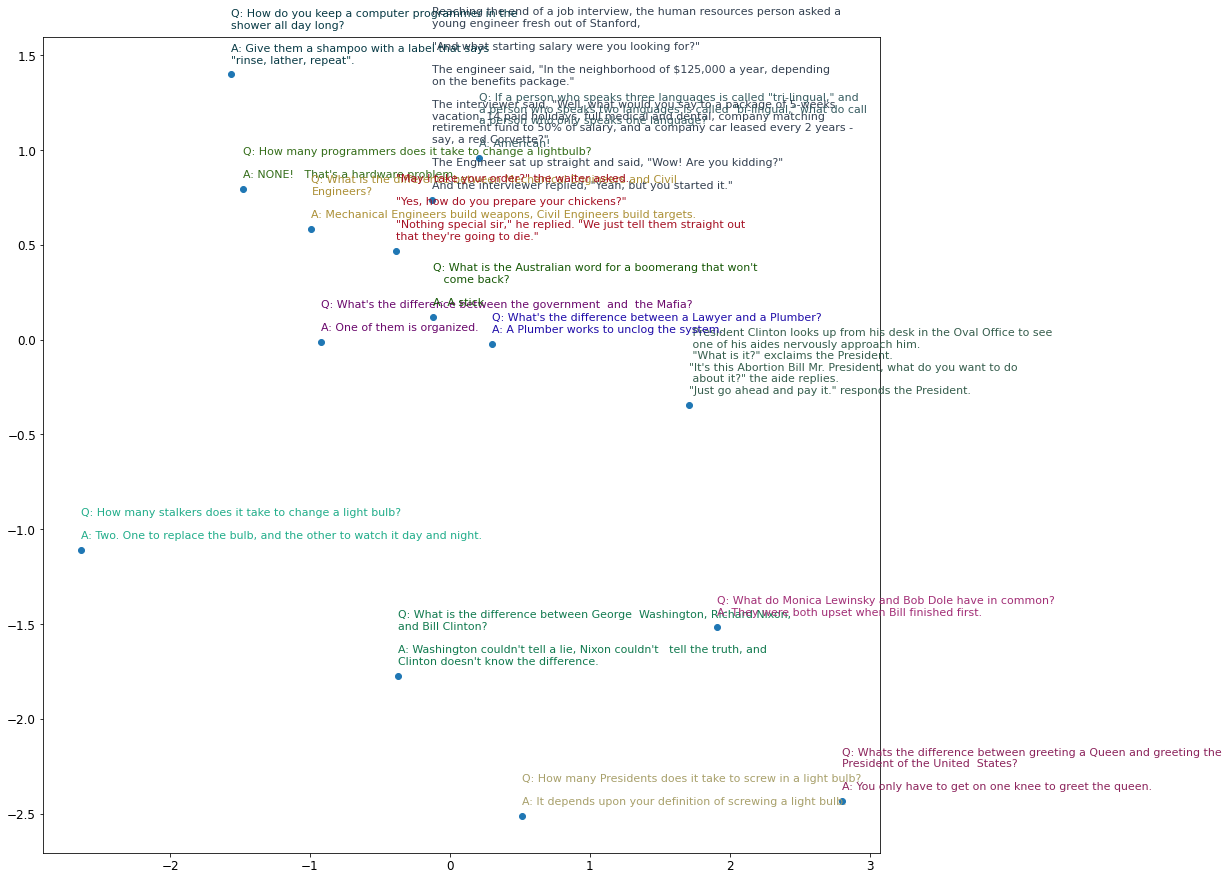

In [26]:
#@title Embedding space of a subset of 15 movies.
idxs = np.random.choice(len(top_jokes), 15, replace=False)
idxs = list(range(15))
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_jokes[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

In [27]:
joke = "Q. What's 200 feet long and has 4 teeth? \n\nA. The front row at a Willie Nelson Concert.\n"

In [28]:
#@title Top 5 most similar jokes of target joke above.
joke_factors = learn.model.i_weight.weight
idx = dls.classes['JokeText'].o2i[joke]
distances = nn.CosineSimilarity(dim=1)(joke_factors, joke_factors[idx][None])
idx = distances.argsort(descending=True)[1:6]
dls.classes['JokeText'][idx]

(#5) ['What do you call an American in the finals of the world cup?\n\n"Hey Beer Man!"\n',"Q. What do a hurricane, a tornado, and a redneck\ndivorce all have in common? \nA. Someone's going to lose their trailer...\n",'A man visits the doctor. The doctor says "I have bad news for you.You have\ncancer and Alzheimer\'s disease". \nThe man replies "Well,thank God I don\'t have cancer!"\n','A couple has been married for 75 years. For the husband\'s 95th\nbirthday, his wife decides to surprise him by hiring a prostitute.\nThat day, the doorbell rings. The husband uses his walker to get to\nthe door and opens it. \nA 21-year-old in a latex outfit smiles and\nsays, "Hi, I here to give you super sex!" \nThe old man says, "I\'ll take the soup."\n','What do you get when you run over a parakeet with a lawnmower? \nShredded tweet.\n']

In [29]:
joke = "Q: Ever wonder why the IRS calls it Form 1040?\n\nA: Because for every $50 that you earn, you get 10 and they get 40.\n"

In [30]:
#@title Top 5 most similar movies of target jokes above.
joke_factors = learn.model.i_weight.weight
idx = dls.classes['JokeText'].o2i[joke]
distances = nn.CosineSimilarity(dim=1)(joke_factors, joke_factors[idx][None])
idx = distances.argsort(descending=True)[1:6]
dls.classes['JokeText'][idx]

(#5) ['If pro- is the opposite of con- then congress must be the opposite\nof progress.\n',"Q: What's the difference between the government  and  the Mafia?\n\nA: One of them is organized.\n",'Hillary, Bill Clinton and the Pope are sitting together on an airplane.\n\nBill says "I could throw one thousand dollar bill out of this plane and\nmake one person very happy."\n\nHillary says "I could throw 10 hundred dollar bills out of the plane and\nmake 10 people very happy."\n\nThe Pope chips in and says "I could throw Bill out of the airplane and make the whole \ncountry happy."\n',"Q: What is the difference between George  Washington, Richard Nixon,\nand Bill Clinton?\n\nA: Washington couldn't tell a lie, Nixon couldn't   tell the truth, and\nClinton doesn't know the difference.\n",'What do you get when you run over a parakeet with a lawnmower? \nShredded tweet.\n']